In [51]:
import pandas as pd

# Load the datasets
matches_df = pd.read_csv('WorldCupMatches.csv')
players_df = pd.read_csv('WorldCupPlayers.csv')
world_cups_df = pd.read_csv('WorldCups.csv')

# Display the first few rows of each dataset to understand their structure
matches_head = matches_df.head()
players_head = players_df.head()
world_cups_head = world_cups_df.head()

matches_head, players_head, world_cups_head


(     Year              Datetime    Stage         Stadium         City  \
 0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
 1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
 2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
 3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
 4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    
 
   Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
 0         France              4.0              1.0         Mexico   
 1            USA              3.0              0.0        Belgium   
 2     Yugoslavia              2.0              1.0         Brazil   
 3        Romania              3.0              1.0           Peru   
 4      Argentina              1.0              0.0         France   
 
   Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
 0                     4444.0                   3.0    

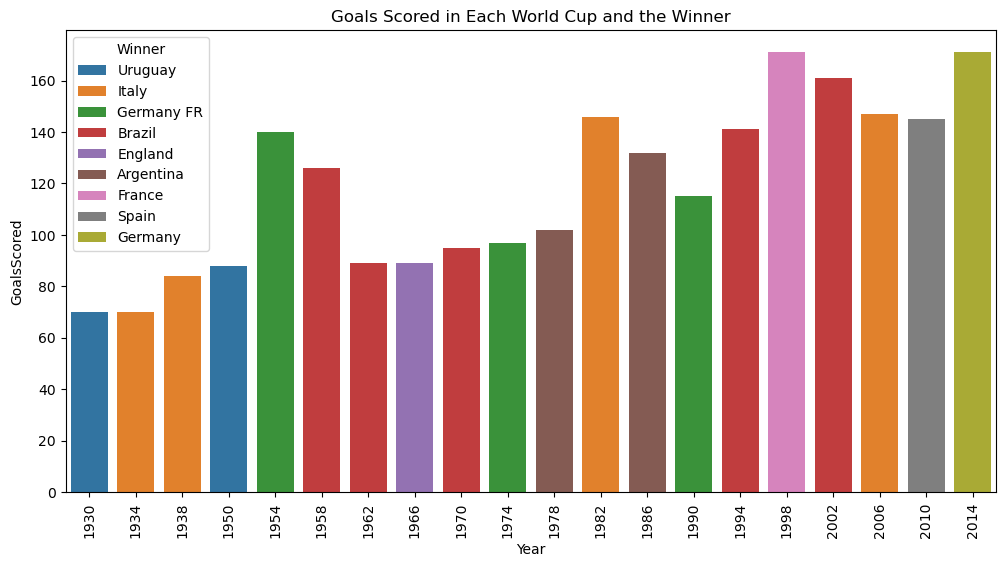

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess data: Convert relevant columns to numeric types and fill any missing values
world_cups_df['GoalsScored'] = pd.to_numeric(world_cups_df['GoalsScored'], errors='coerce')
world_cups_df['Attendance'] = world_cups_df['Attendance'].str.replace('.', '').astype(float)
world_cups_df['MatchesPlayed'] = pd.to_numeric(world_cups_df['MatchesPlayed'], errors='coerce')
world_cups_df['QualifiedTeams'] = pd.to_numeric(world_cups_df['QualifiedTeams'], errors='coerce')

# Calculate key metrics and visualize them
# 1. Goals Scored vs Winner
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='GoalsScored', hue='Winner', data=world_cups_df, dodge=False)
plt.title('Goals Scored in Each World Cup and the Winner')
plt.xticks(rotation=90)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


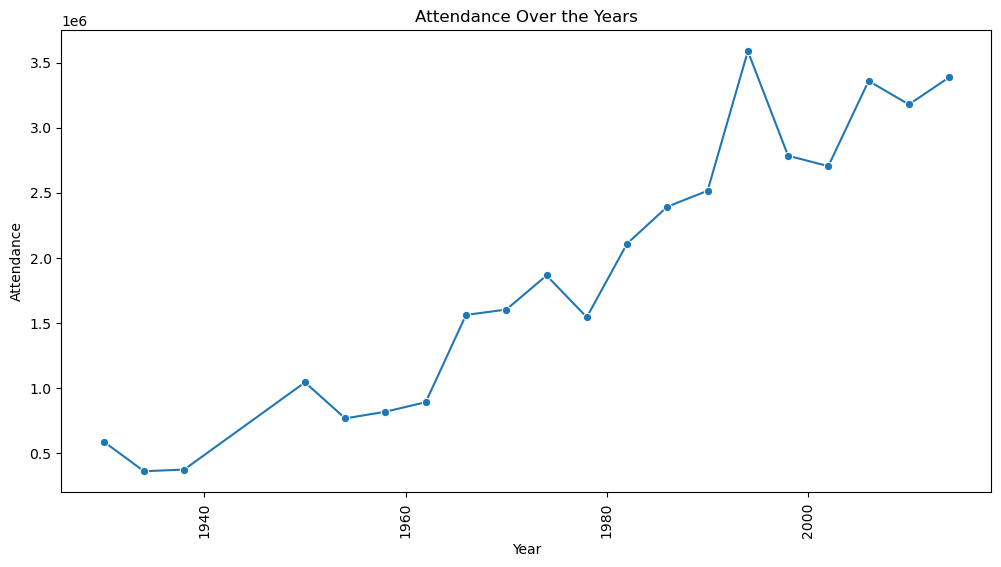

In [53]:
# 2. Attendance Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Attendance', data=world_cups_df, marker='o')
plt.title('Attendance Over the Years')
plt.xticks(rotation=90)
plt.show()

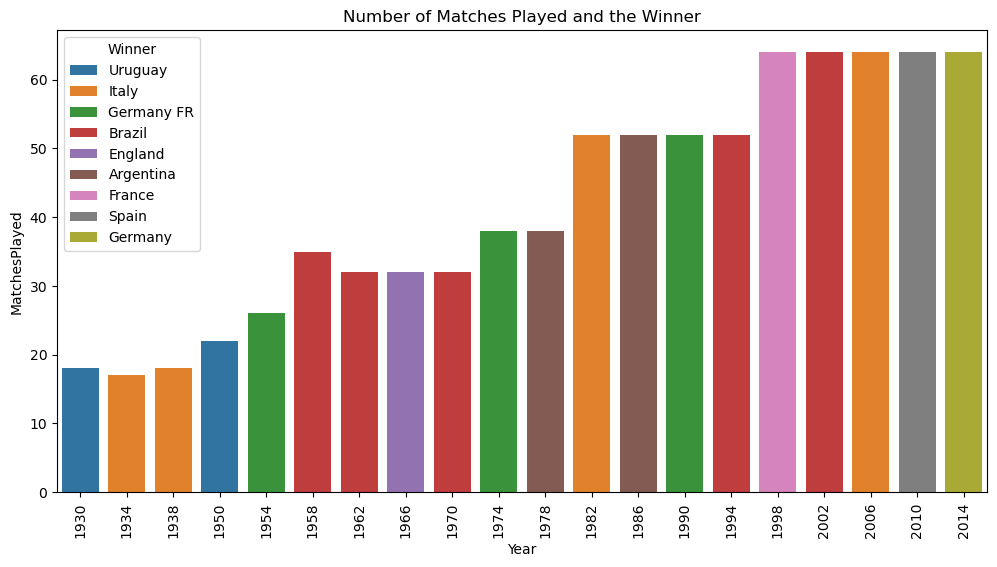

In [54]:
# 3. Number of Matches Played vs Winner
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='MatchesPlayed', hue='Winner', data=world_cups_df, dodge=False)
plt.title('Number of Matches Played and the Winner')
plt.xticks(rotation=90)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


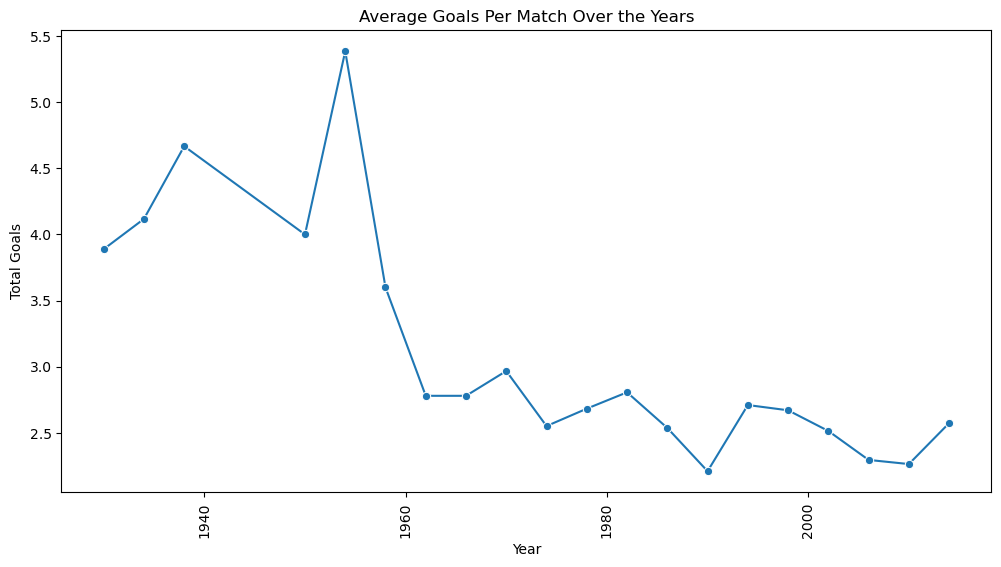

In [55]:
# 4. Goals Scored by Home and Away Teams (from Matches Dataset)
matches_df['Total Goals'] = matches_df['Home Team Goals'] + matches_df['Away Team Goals']
avg_goals_per_match = matches_df.groupby('Year')['Total Goals'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Goals', data=avg_goals_per_match, marker='o')
plt.title('Average Goals Per Match Over the Years')
plt.xticks(rotation=90)
plt.show()

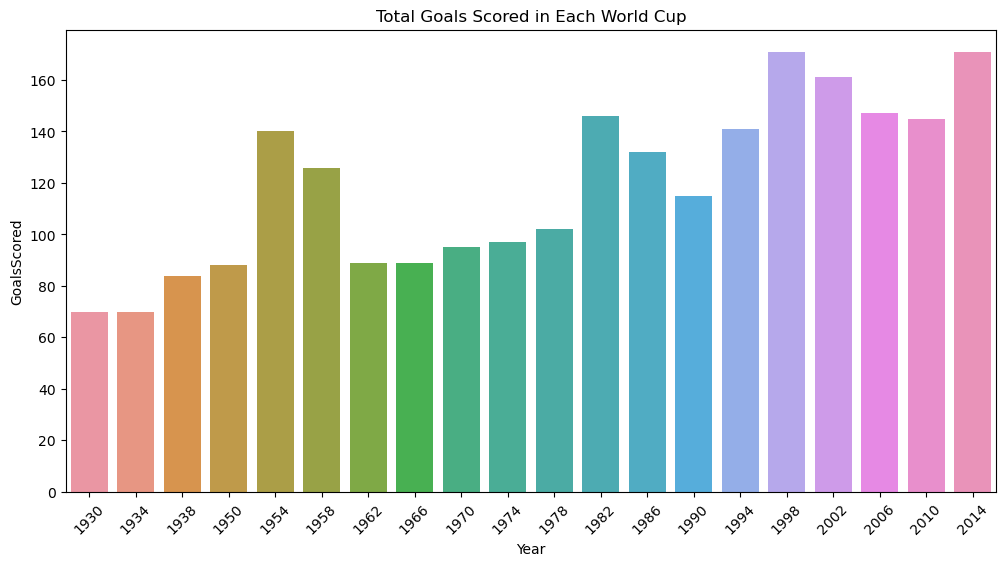

In [56]:
# Step 3: Exploratory Data Analysis (EDA)
# Total goals scored in each World Cup
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='GoalsScored', data=world_cups_df)
plt.title('Total Goals Scored in Each World Cup')
plt.xticks(rotation=45)
plt.show()

In [57]:
# Step 2: Feature Engineering
# Create a new feature: Average Goals per Match
world_cups_df['AvgGoalsPerMatch'] = world_cups_df['GoalsScored'] / world_cups_df['MatchesPlayed']

# Create a goal difference feature for each match
matches_df['GoalDifference'] = abs(matches_df['Home Team Goals'] - matches_df['Away Team Goals'])



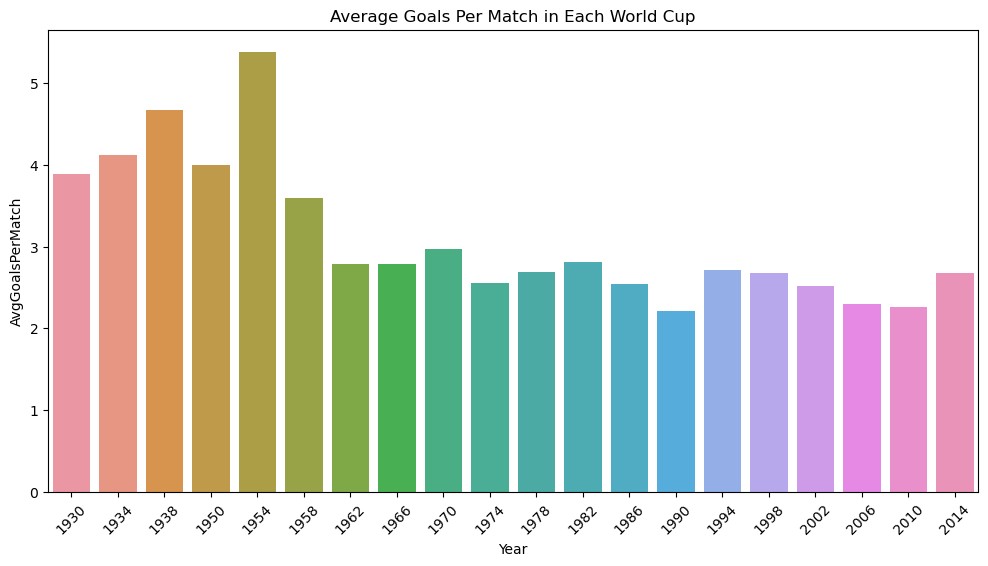

In [58]:
# Average Goals per Match in each World Cup
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='AvgGoalsPerMatch', data=world_cups_df)
plt.title('Average Goals Per Match in Each World Cup')
plt.xticks(rotation=45)
plt.show()

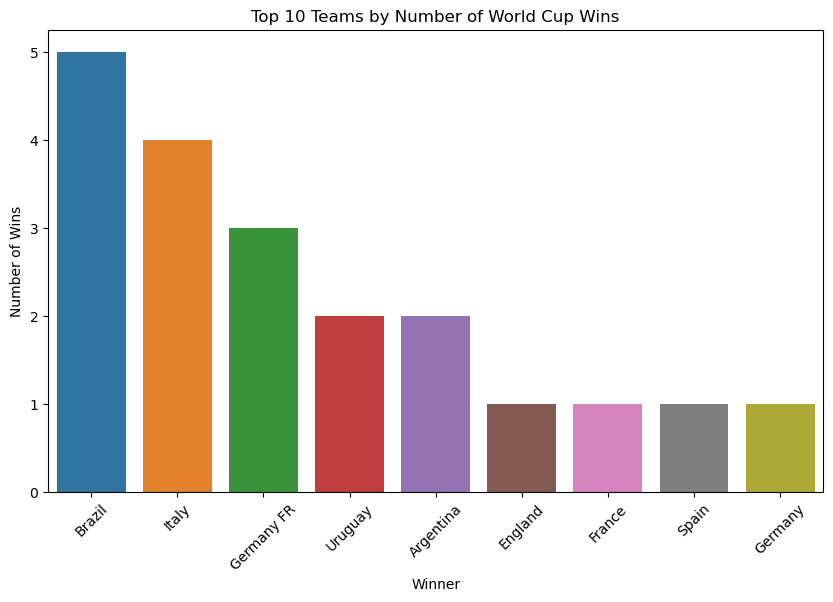

In [59]:


# Step 1: Team Performance Analysis
# Top 10 Teams by Number of Wins
top_winning_teams = world_cups_df['Winner'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_winning_teams.index, y=top_winning_teams.values)
plt.title('Top 10 Teams by Number of World Cup Wins')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()



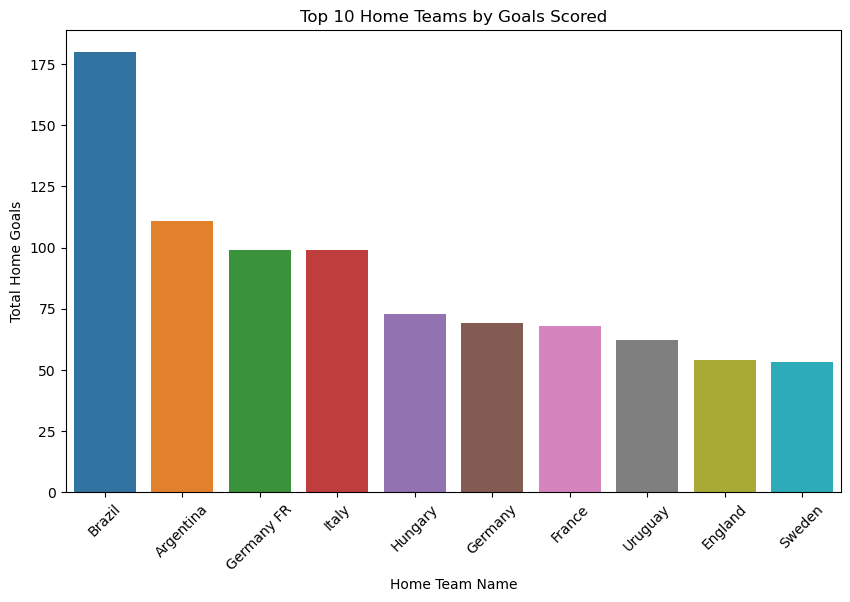

In [60]:
# Step 2: Home and Away Team Performance
# Comparing Home vs Away Team Goals
home_goals = matches_df.groupby('Home Team Name')['Home Team Goals'].sum().sort_values(ascending=False).head(10)
away_goals = matches_df.groupby('Away Team Name')['Away Team Goals'].sum().sort_values(ascending=False).head(10)

# Plotting Home Team Goals
plt.figure(figsize=(10, 6))
sns.barplot(x=home_goals.index, y=home_goals.values)
plt.title('Top 10 Home Teams by Goals Scored')
plt.ylabel('Total Home Goals')
plt.xticks(rotation=45)
plt.show()

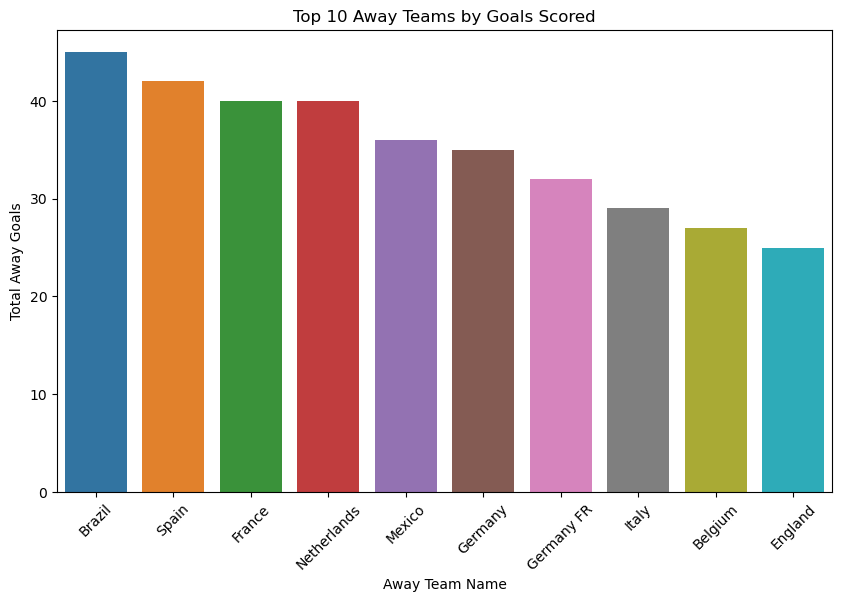

In [61]:
# Plotting Away Team Goals
plt.figure(figsize=(10, 6))
sns.barplot(x=away_goals.index, y=away_goals.values)
plt.title('Top 10 Away Teams by Goals Scored')
plt.ylabel('Total Away Goals')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


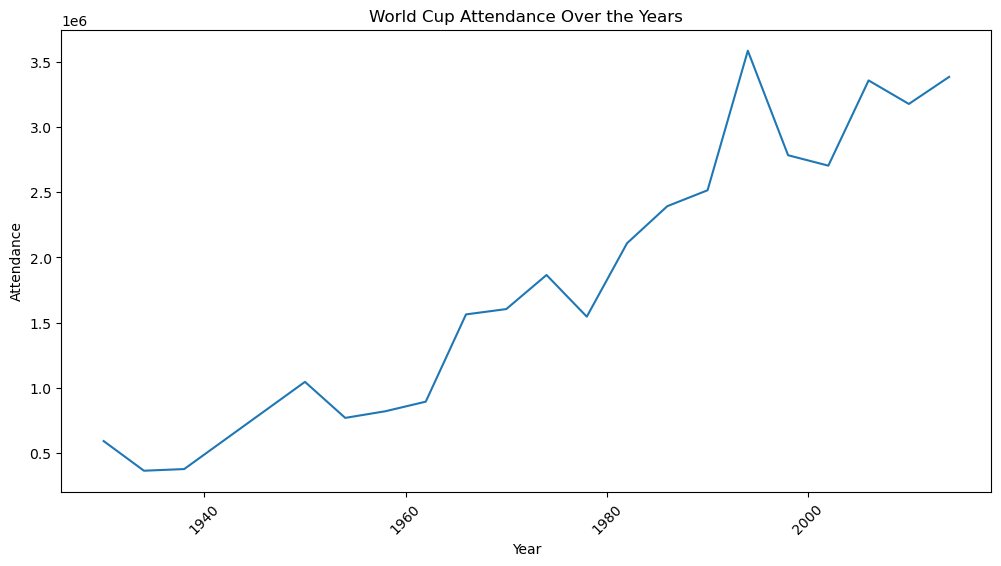

In [62]:
# Step 3: Attendance Trends
# Attendance over the years in World Cups
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Attendance', data=world_cups_df)
plt.title('World Cup Attendance Over the Years')
plt.xticks(rotation=45)
plt.show()


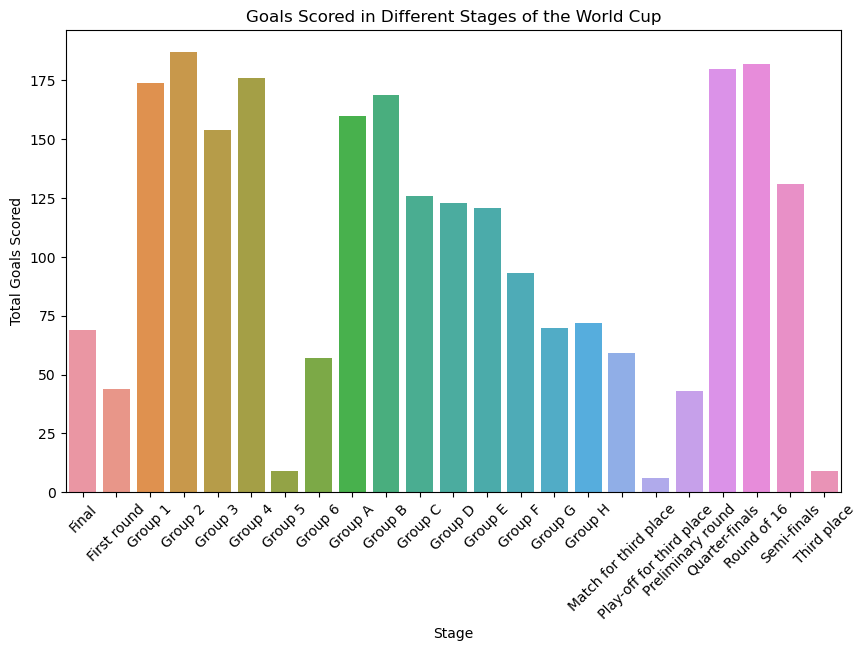

In [63]:
# Step 4: Goals Analysis in Different Stages of the Tournament
# Total goals by stage
goals_by_stage = matches_df.groupby('Stage')[['Home Team Goals', 'Away Team Goals']].sum().reset_index()
goals_by_stage['Total Goals'] = goals_by_stage['Home Team Goals'] + goals_by_stage['Away Team Goals']

plt.figure(figsize=(10, 6))
sns.barplot(x='Stage', y='Total Goals', data=goals_by_stage)
plt.title('Goals Scored in Different Stages of the World Cup')
plt.xticks(rotation=45)
plt.ylabel('Total Goals Scored')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


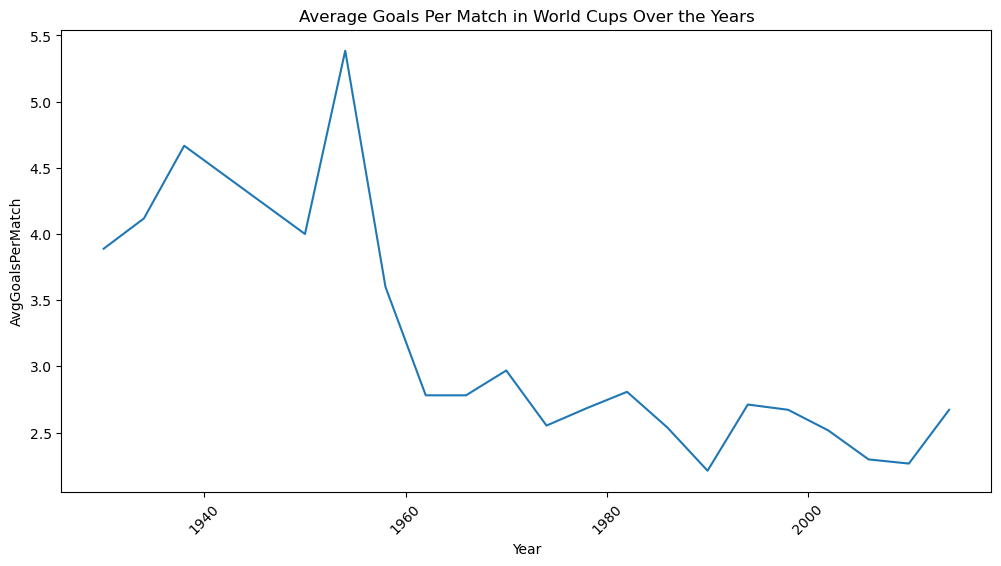

In [64]:
# Step 6: Average Goals per Match over the years
# Calculate average goals per match
world_cups_df['AvgGoalsPerMatch'] = world_cups_df['GoalsScored'] / world_cups_df['MatchesPlayed']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='AvgGoalsPerMatch', data=world_cups_df)
plt.title('Average Goals Per Match in World Cups Over the Years')
plt.xticks(rotation=45)
plt.show()

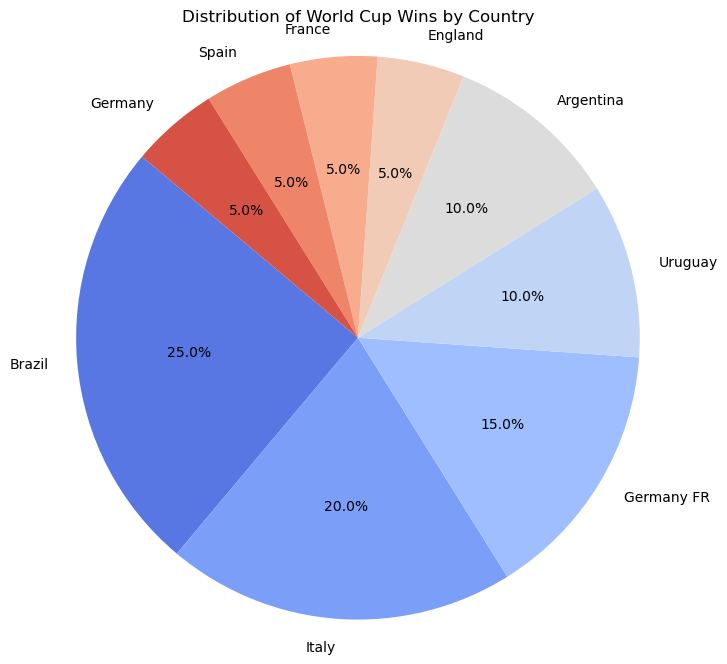

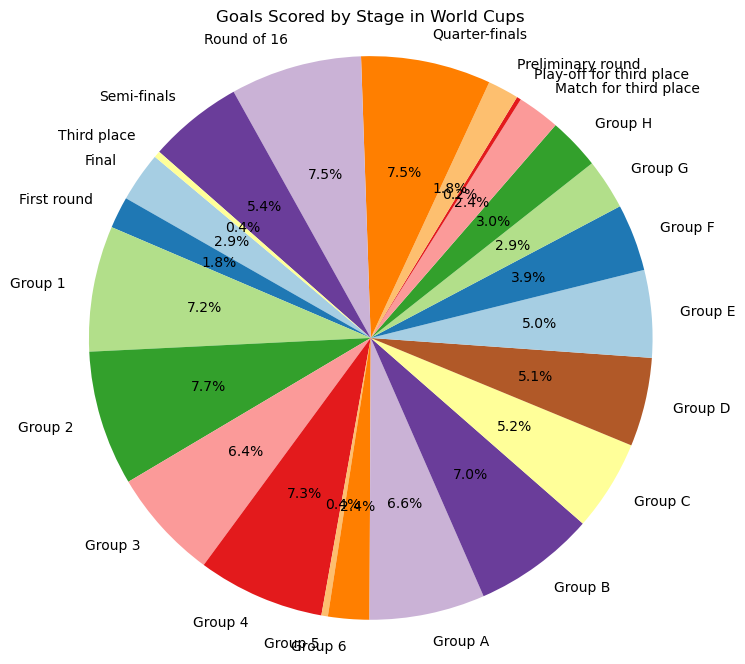

In [65]:


# Step 1: Pie Charts

# 1.1 Pie chart of World Cup Wins by Country
wins_by_country = world_cups_df['Winner'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wins_by_country, labels=wins_by_country.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(wins_by_country)))
plt.title('Distribution of World Cup Wins by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# 1.2 Pie chart of goals scored by stage in World Cup Matches
# First, calculate total goals per stage (Home + Away)
goals_by_stage = matches_df.groupby('Stage')[['Home Team Goals', 'Away Team Goals']].sum()
goals_by_stage['Total Goals'] = goals_by_stage['Home Team Goals'] + goals_by_stage['Away Team Goals']

plt.figure(figsize=(8, 8))
plt.pie(goals_by_stage['Total Goals'], labels=goals_by_stage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired', len(goals_by_stage)))
plt.title('Goals Scored by Stage in World Cups')
plt.axis('equal')
plt.show()





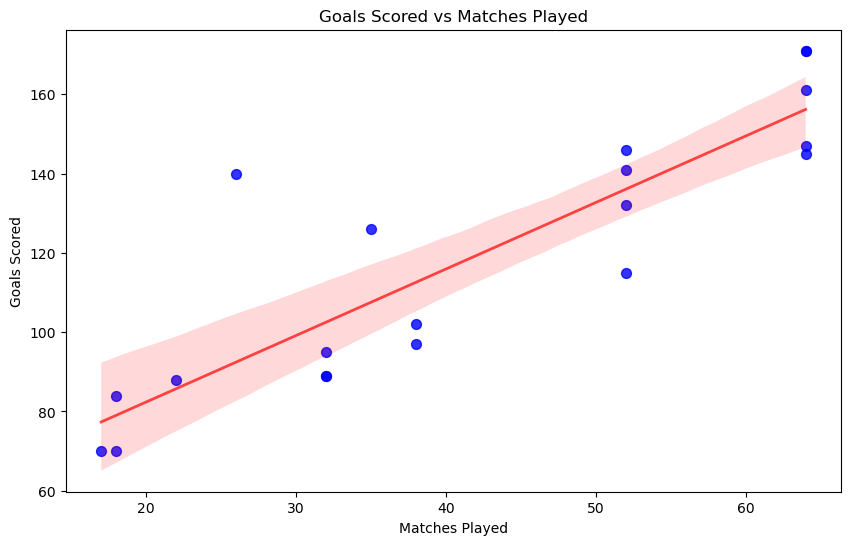

In [66]:

# Step 1: Scatter Plots with Regression Lines
# Scatter plot for Goals Scored vs Matches Played
plt.figure(figsize=(10, 6))
sns.regplot(x='MatchesPlayed', y='GoalsScored', data=world_cups_df, scatter_kws={'s':50}, color='b', line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Goals Scored vs Matches Played')
plt.xlabel('Matches Played')
plt.ylabel('Goals Scored')
plt.show()



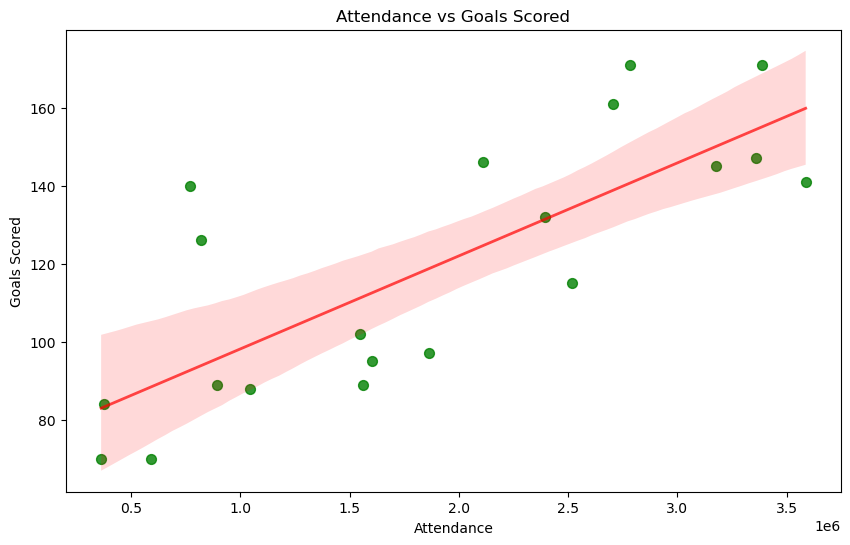

In [67]:
# Scatter plot for Attendance vs Goals Scored
plt.figure(figsize=(10, 6))
sns.regplot(x='Attendance', y='GoalsScored', data=world_cups_df, scatter_kws={'s':50}, color='g', line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Attendance vs Goals Scored')
plt.xlabel('Attendance')
plt.ylabel('Goals Scored')
plt.show()

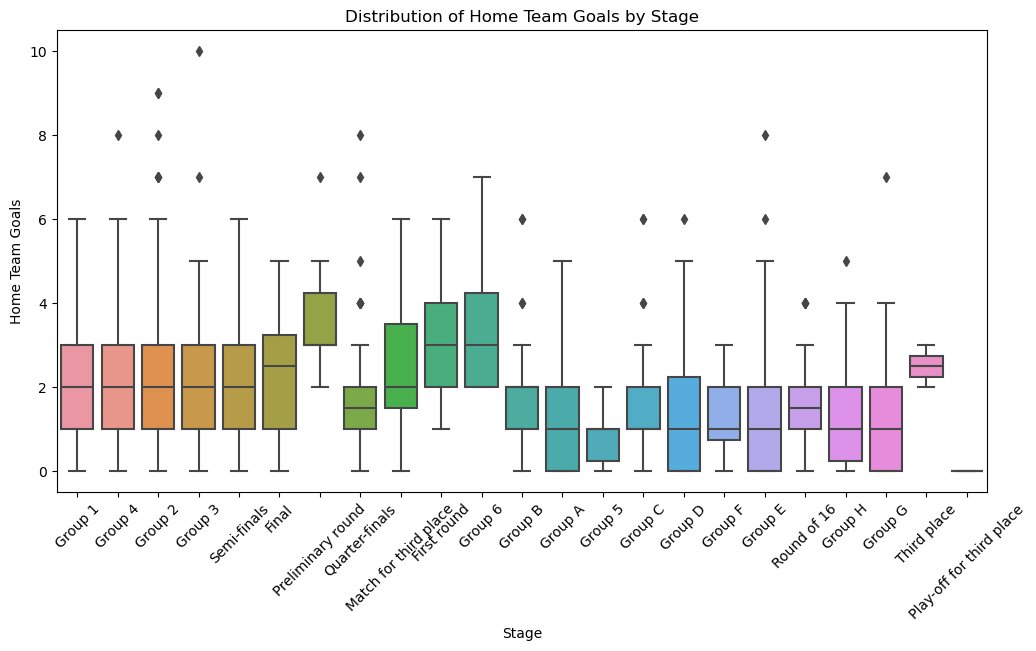

In [68]:
# Step 2: Box Plots
# Distribution of Goals by Tournament Stage
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stage', y='Home Team Goals', data=matches_df)
plt.title('Distribution of Home Team Goals by Stage')
plt.xticks(rotation=45)
plt.ylabel('Home Team Goals')
plt.show()

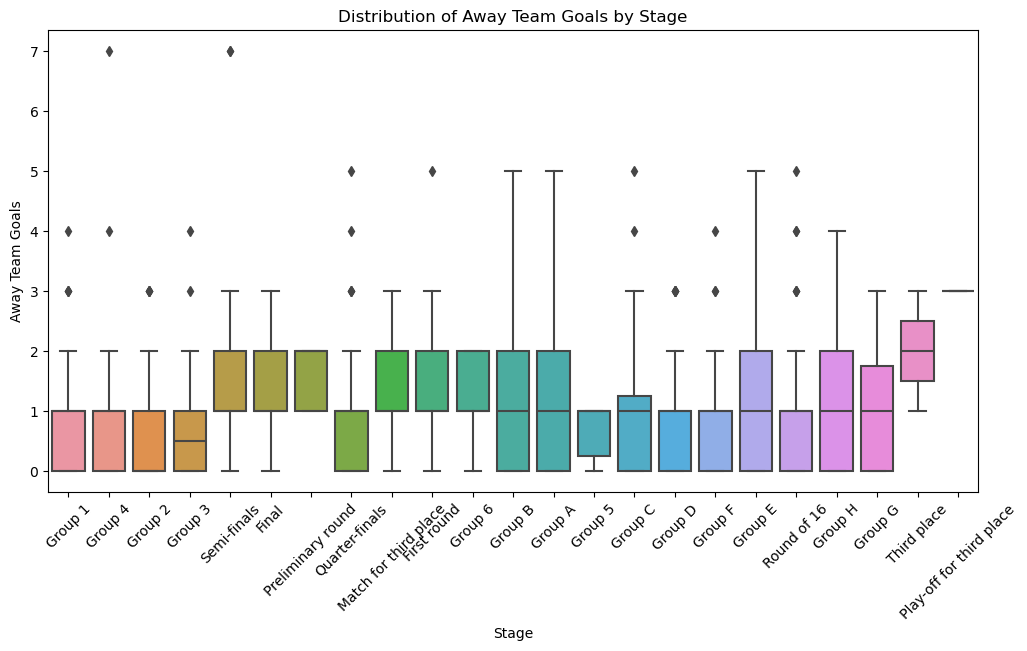

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stage', y='Away Team Goals', data=matches_df)
plt.title('Distribution of Away Team Goals by Stage')
plt.xticks(rotation=45)
plt.ylabel('Away Team Goals')
plt.show()


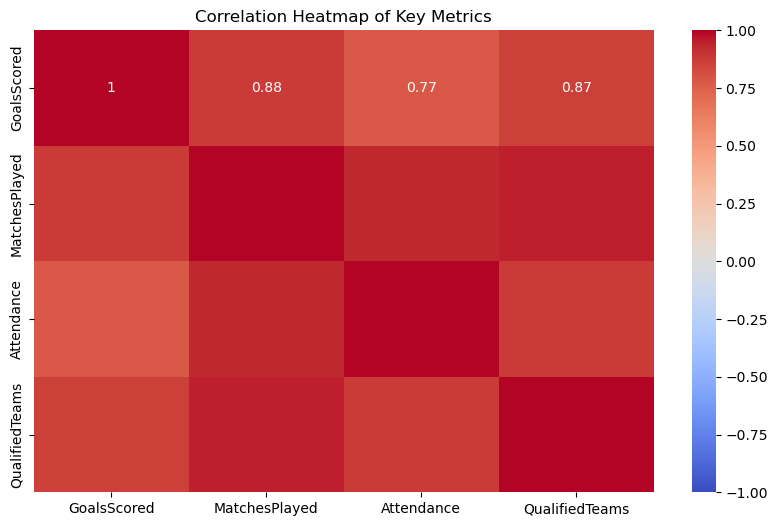

In [70]:
# Step 3: Heatmap for Correlation
# Correlation between key numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = world_cups_df[['GoalsScored', 'MatchesPlayed', 'Attendance', 'QualifiedTeams']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Metrics')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


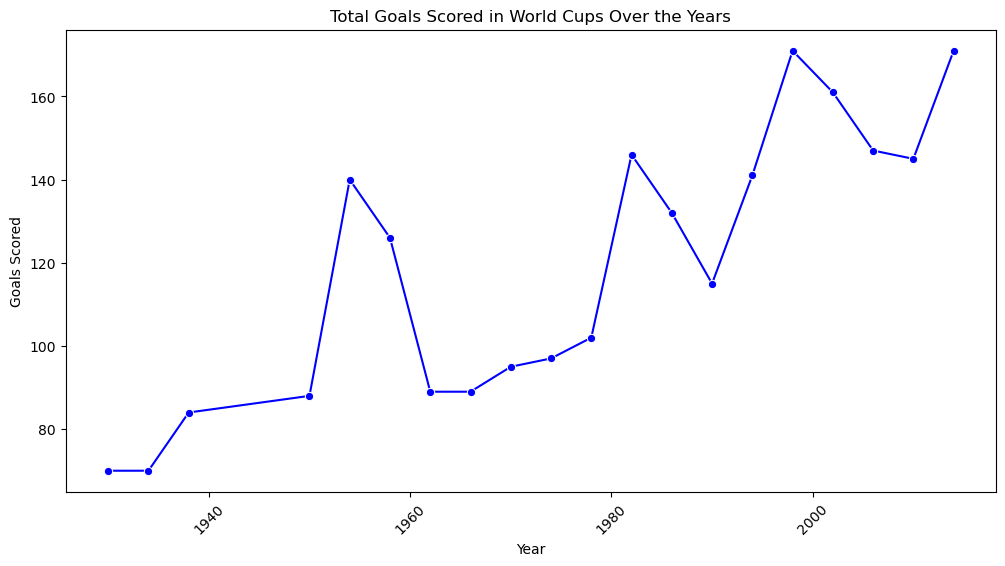

In [71]:
# Step 4: Line Plots
# Line plot of total goals scored over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GoalsScored', data=world_cups_df, marker='o', color='b')
plt.title('Total Goals Scored in World Cups Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


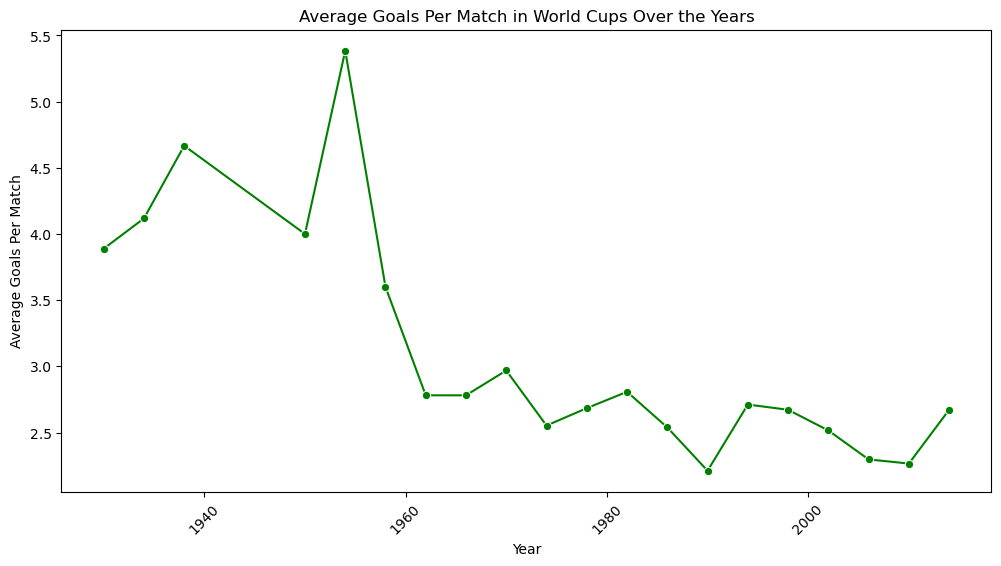

In [72]:
# Line plot of average goals per match over the years
world_cups_df['AvgGoalsPerMatch'] = world_cups_df['GoalsScored'] / world_cups_df['MatchesPlayed']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='AvgGoalsPerMatch', data=world_cups_df, marker='o', color='g')
plt.title('Average Goals Per Match in World Cups Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals Per Match')
plt.xticks(rotation=45)
plt.show()